<a href="https://colab.research.google.com/github/mahfuzaakter/fordatascience/blob/main/setu%20data-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyreadstat pandas linearmodels matplotlib seaborn

import os
import re
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from google.colab import files
from linearmodels import PanelOLS, RandomEffects

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 666.4/666.4 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 6.9 MB/s eta 0:00:00


In [3]:
from google.colab import files
uploaded = files.upload()

Saving data22.14.11.csv to data22.14.11.csv


In [4]:
df=pd.read_csv(r"data22.14.11.csv")

/tmp/ipython-input-3685828151.py:1: DtypeWarning: Columns (5,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,61,63,64,65,67,70,71,73,74,75,76,77,78,79,80,81,82,84,85,86,87,88,89,90,91,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"data22.14.11.csv")


In [5]:
df

,Unnamed: 0,hhid,cn,hn,shdistrict11,v00011,v01211,v02111,v02411,v02511,...,h11_1,h11b_1,h22_1,h31_1,h31b_1,h31c_1,hw57_1,hw70_1,hw71_1,hw73_1
0,0,1 3,1,3,4.0,BD6,37.0,1.0,barisal,rural,...,no,NaN,yes,"yes, last two weeks",yes,chest only,NaN,-103.0,-216.0,-220.0
1,1,1 7,1,7,4.0,BD6,25.0,1.0,barisal,rural,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1 10,1,10,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1 13,1,13,4.0,BD6,30.0,1.0,barisal,rural,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1 16,1,16,4.0,BD6,25.0,1.0,barisal,rural,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50138,50138,675 127,675,127,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50139,50139,675 130,675,130,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50140,50140,675 134,675,134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50141,50141,675 137,675,137,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(50143, 96)

In [7]:
print(df.index)
print(df.columns)

RangeIndex(start=0, stop=50143, step=1)
Index(['Unnamed: 0', 'hhid', 'cn', 'hn', 'shdistrict11', 'v00011', 'v01211',
       'v02111', 'v02411', 'v02511', 'v02611', 'v10611', 'v11311', 'v11511',
       'v11611', 'v11911', 'v13011', 'v15111', 'v16011', 'v16111', 'v19011',
       'ml10111', 'b5_0111', 'b6_0111', 'h11_111', 'h11b_111', 'h22_111',
       'h31_111', 'h31b_11', 'h31c_111', 'h31d_111', 'hw57_111', 'hw70_111',
       'hw71_111', 'hw73_111', 'district', 'ccp', 'rca', 'psu', 'div', 'res',
       'pres', 'hel', 'sdw', 'tgws', 'ttf', 'he', 'religion', 'sex', 'toilet',
       'tcf', 'wi', 'mb', 'ca', 'ad', 'dr', 'bs', 'fltw', 'cltw', 'srb', 'pcb',
       'h31d_1', 'al', 'height', 'weight', 'bmi', 'shdistrict', 'v000', 'v012',
       'v021', 'v024', 'v025', 'v026', 'v106', 'v113', 'v115', 'v116', 'v119',
       'v130', 'v151', 'v160', 'v161', 'v190', 'ml101', 'b5_01', 'b6_01',
       'h11_1', 'h11b_1', 'h22_1', 'h31_1', 'h31b_1', 'h31c_1', 'hw57_1',
       'hw70_1', 'hw71_1', 'hw73_1

In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50143 entries, 0 to 50142
Data columns (total 96 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    50143 non-null  int64  
 1   hhid          50143 non-null  object 
 2   cn            50143 non-null  int64  
 3   hn            50143 non-null  int64  
 4   shdistrict11  17141 non-null  float64
 5   v00011        14826 non-null  object 
 6   v01211        14826 non-null  float64
 7   v02111        14826 non-null  float64
 8   v02411        14826 non-null  object 
 9   v02511        14826 non-null  object 
 10  v02611        14826 non-null  object 
 11  v10611        14826 non-null  object 
 12  v11311        14826 non-null  object 
 13  v11511        14826 non-null  object 
 14  v11611        14826 non-null  object 
 15  v11911        14826 non-null  object 
 16  v13011        14826 non-null  object 
 17  v15111        14826 non-null  object 
 18  v16011        14255 non-nu

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'cn'}>, <Axes: title={'center': 'hn'}>,
        <Axes: title={'center': 'shdistrict11'}>],
       [<Axes: title={'center': 'v01211'}>,
        <Axes: title={'center': 'v02111'}>,
        <Axes: title={'center': 'ml10111'}>,
        <Axes: title={'center': 'rca'}>],
       [<Axes: title={'center': 'psu'}>, <Axes: title={'center': 'mb'}>,
        <Axes: title={'center': 'bs'}>, <Axes: title={'center': 'al'}>],
       [<Axes: title={'center': 'shdistrict'}>,
        <Axes: title={'center': 'v012'}>,
        <Axes: title={'center': 'v021'}>,
        <Axes: title={'center': 'v026'}>],
       [<Axes: title={'center': 'ml101'}>,
        <Axes: title={'center': 'hw57_1'}>, <Axes: >, <Axes: >]],
      dtype=object)

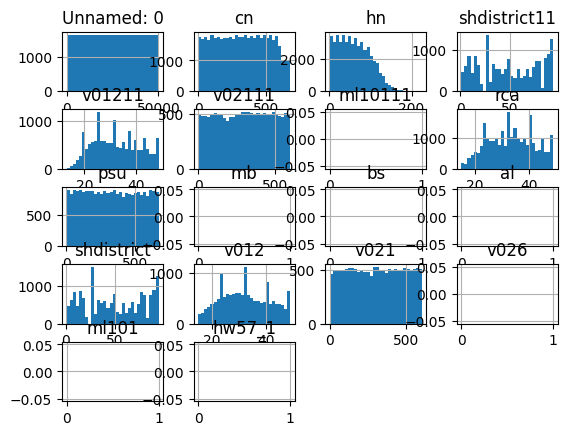

In [9]:
df.hist(bins=30)

<Axes: >

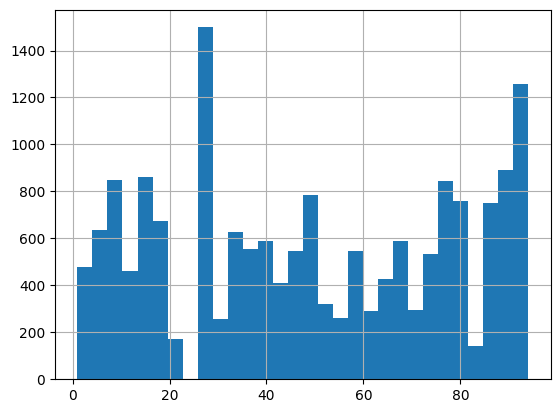

In [10]:
df['shdistrict'].hist(bins=30)

<Axes: >

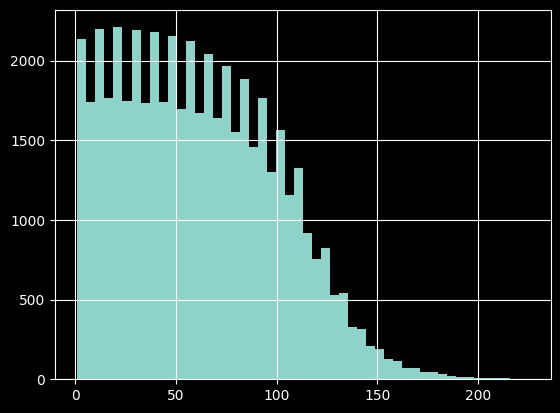

In [11]:
# we can use dark_background
plt.style.use('dark_background')
df['hn'].hist(bins=50)

<Axes: xlabel='shdistrict'>

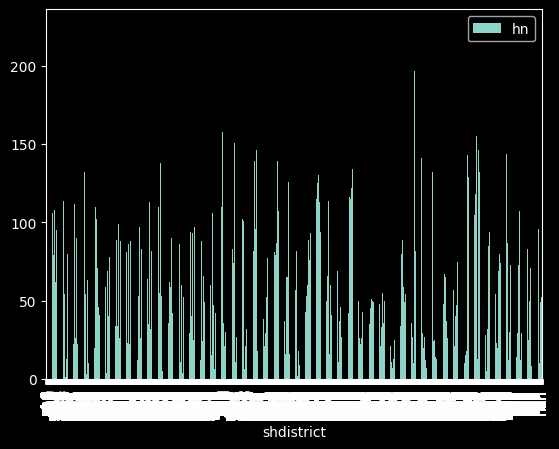

In [12]:
df.plot.bar(x='shdistrict', y='hn')

<Axes: >

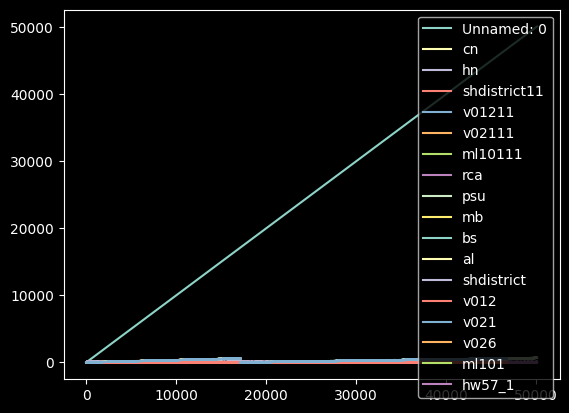

In [13]:
df.plot()

<Axes: xlabel='shdistrict'>

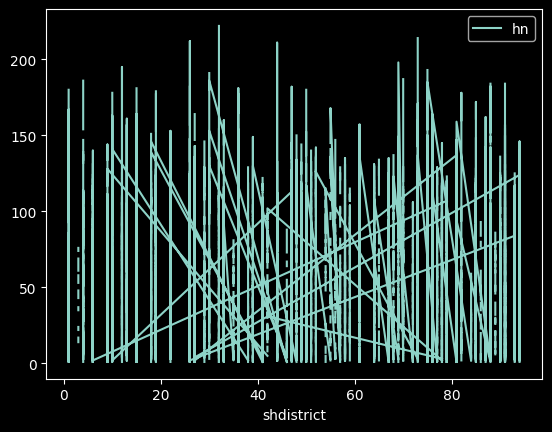

In [18]:
df.plot.line(x='shdistrict', y='hn')

<Axes: xlabel='hn', ylabel='shdistrict'>

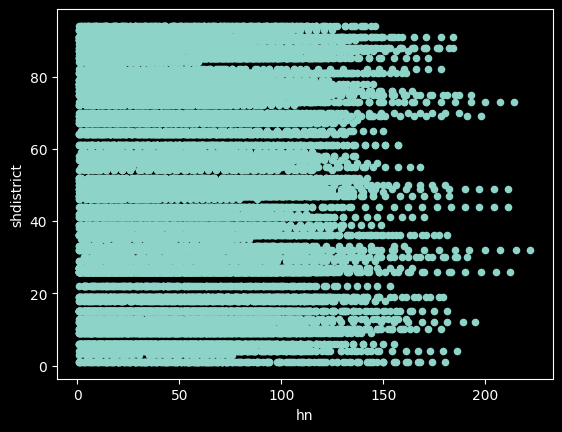

In [16]:
df.plot.scatter(x='hn', y='shdistrict')

<Axes: xlabel='v012', ylabel='shdistrict'>

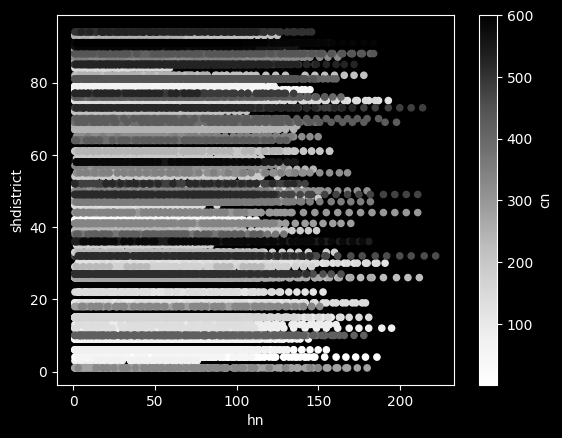

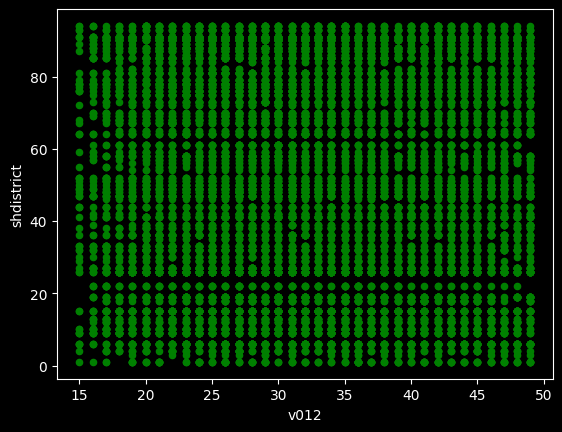

In [26]:
df.plot.scatter(x='hn', y='shdistrict', c='cn')
df.plot.scatter(x='v012',y='shdistrict' , c='green'  )

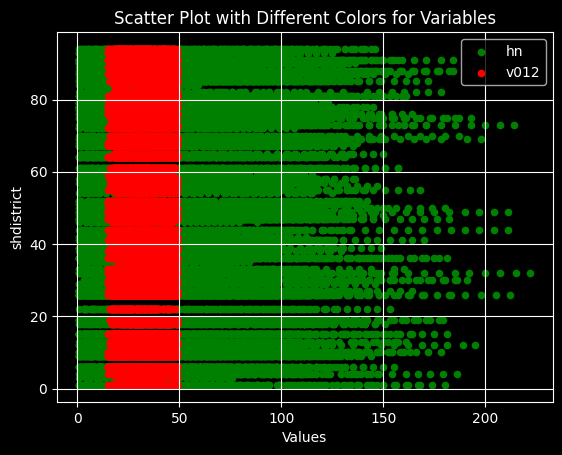

In [27]:
fig, ax = plt.subplots()

# প্রথম ভেরিয়েবলের জন্য প্লট, সবুজ রঙে
df.plot.scatter(x='hn', y='shdistrict', c='green', label='hn', ax=ax)

# দ্বিতীয় ভেরিয়েবলের জন্য প্লট, লাল রঙে
df.plot.scatter(x='v012', y='shdistrict', c='red', label='v012', ax=ax)

# প্লটের শিরোনাম এবং লেবেল যোগ করা
plt.title('Scatter Plot with Different Colors for Variables')
plt.xlabel('Values')
plt.ylabel('shdistrict')
plt.legend() # লেজেন্ড প্রদর্শন
plt.grid(True)
plt.show()

In [19]:
plt.figure(figsize=(10,5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

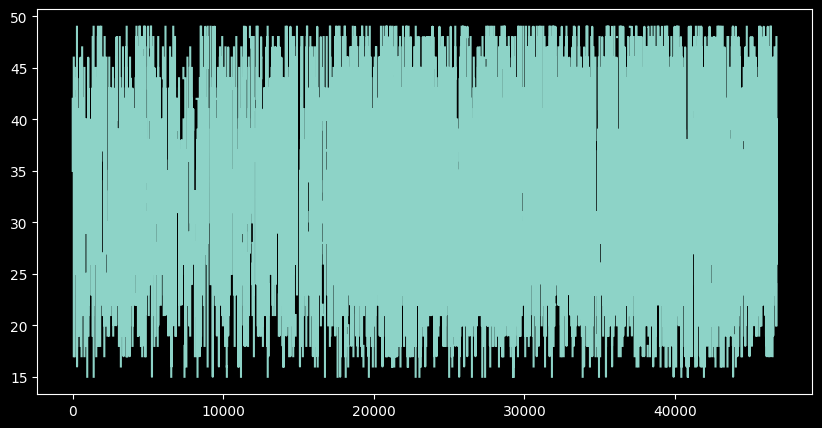

In [21]:
plt.subplots(figsize=(10,5))
plt.plot( df['v012'])

<Axes: ylabel='Frequency'>

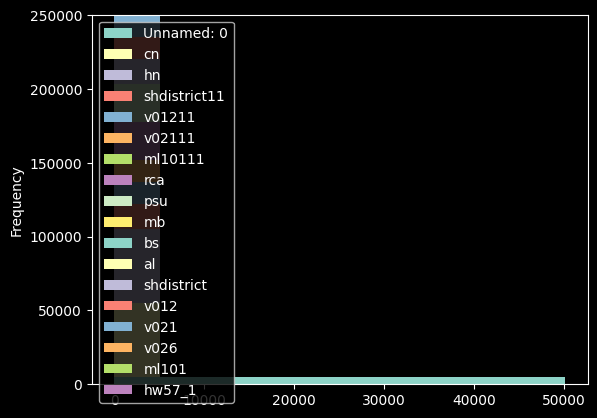

In [31]:
df.plot.hist(stacked = True)

<Axes: >

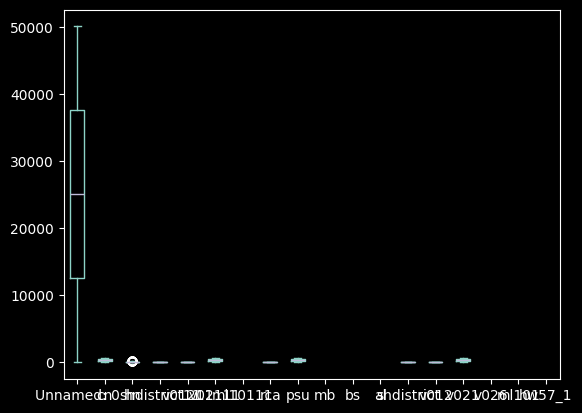

In [32]:
df.plot.box()

In [ ]:
df.plot.bar(stacked=True, figsize=(10,5))

KeyboardInterrupt: 